✅ Accuracy: 0.9668161434977578

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



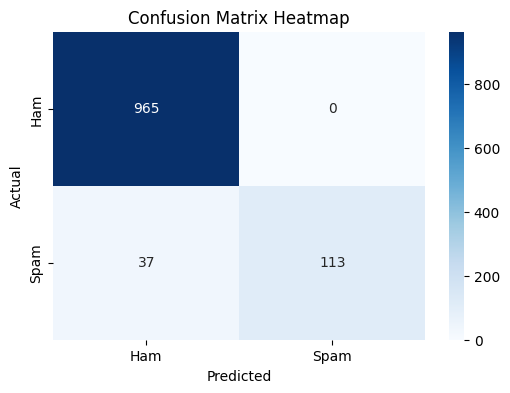

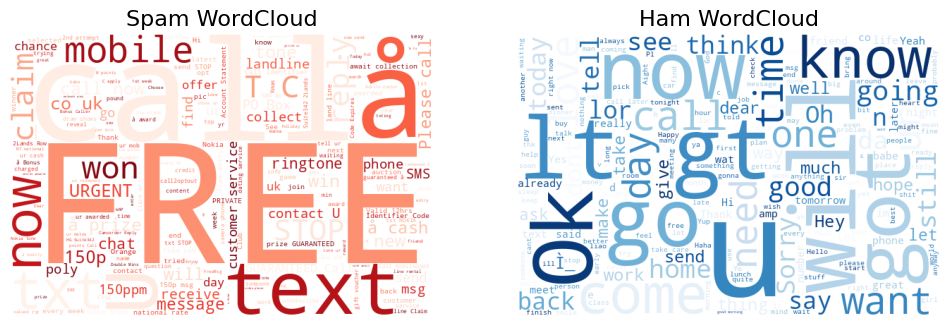

In [26]:
# Step 1: Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Step 2: Load Dataset
data = pd.read_csv("spam.csv", encoding="latin-1")[["v1", "v2"]]
data.columns = ["label", "text"]
data["label"] = data["label"].map({"ham": 0, "spam": 1})

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    data["text"], data["label"], test_size=0.2, random_state=42
)

# Step 4: Vectorization
vectorizer = TfidfVectorizer(stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 5: Model Training
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Step 6: Prediction & Evaluation
y_pred = model.predict(X_test_vec)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 7: Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Step 8: WordClouds
spam_words = " ".join(data[data['label']==1]['text'])
ham_words = " ".join(data[data['label']==0]['text'])

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Spam WordCloud", fontsize=16)
plt.imshow(WordCloud(width=600, height=400, background_color="white", colormap="Reds").generate(spam_words))
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Ham WordCloud", fontsize=16)
plt.imshow(WordCloud(width=600, height=400, background_color="white", colormap="Blues").generate(ham_words))
plt.axis("off")

plt.show()
